In [16]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import os

In [17]:
directory = '../output/05_02_2024_rho_evolution'
files = os.listdir(directory)
files = [file for file in files if file.endswith('y-output.csv')]
files

dfs = []

for i, file in enumerate(files):
    df = pd.read_csv(os.path.join(directory, file))
    # df.rename(columns={'line': 'experiment'}, inplace=True)
    df['experiment'] = i+1
    dfs.append(df)
    
df = pd.concat(dfs, ignore_index=True)
df = df[df['experiment'] == 1]
df.drop(columns=['experiment'], inplace=True)
df

,line,rho1,rho2,rho3,rho4,rho5,rho6,rho7,rho8,rho9,...,rho61,rho62,rho63,rho64,rho65,rho66,rho67,rho68,rho69,origin
0,0,0.124237,0.125479,0.121370,0.117273,0.112529,0.107609,0.102737,0.097940,0.093177,...,-0.036951,-0.038757,-0.040570,-0.042389,-0.044214,-0.046045,-0.047883,-0.049725,-0.051573,true
1,1,0.105437,0.106808,0.103805,0.100986,0.097473,0.093771,0.090065,0.086383,0.082652,...,-0.042079,-0.043859,-0.045642,-0.047431,-0.049225,-0.051024,-0.052828,-0.054635,-0.056447,true
2,2,0.103920,0.106617,0.103951,0.100534,0.096488,0.092323,0.088108,0.083823,0.079442,...,-0.050730,-0.052539,-0.054352,-0.056170,-0.057995,-0.059825,-0.061661,-0.063503,-0.065352,true
3,3,0.124348,0.125686,0.121772,0.117827,0.113179,0.108296,0.103400,0.098538,0.093689,...,-0.039558,-0.041372,-0.043189,-0.045011,-0.046837,-0.048665,-0.050499,-0.052334,-0.054173,true
4,4,0.119962,0.127282,0.115775,0.106902,0.099921,0.093766,0.088100,0.082734,0.077481,...,-0.054882,-0.056722,-0.058567,-0.060417,-0.062274,-0.064134,-0.065999,-0.067868,-0.069744,true
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
3995,1995,0.081720,0.085725,0.081936,0.080713,0.078892,0.076800,0.075310,0.073778,0.070551,...,-0.044662,-0.047320,-0.048790,-0.050612,-0.052252,-0.054159,-0.055980,-0.058261,-0.059238,pred
3996,1996,0.120275,0.125916,0.117145,0.110427,0.105934,0.100587,0.096292,0.091911,0.088067,...,-0.034296,-0.036644,-0.038826,-0.040594,-0.042127,-0.044492,-0.045533,-0.047669,-0.049850,pred
3997,1997,0.118179,0.119495,0.115120,0.112118,0.107148,0.102580,0.098218,0.093234,0.089152,...,-0.041801,-0.043871,-0.045739,-0.047215,-0.049489,-0.051196,-0.052885,-0.054138,-0.055639,pred
3998,1998,0.105005,0.107574,0.103741,0.102157,0.099078,0.095270,0.092353,0.087712,0.084964,...,-0.037496,-0.039507,-0.041396,-0.043395,-0.044307,-0.047239,-0.048012,-0.050443,-0.052648,pred


In [18]:
df_long = df.copy()
df_long.drop(columns=['line'], inplace=True)
df_long = pd.melt(df_long, id_vars=['origin'], var_name='time', value_name='rho')
df_long['time'] = df_long['time'].str.extract(r'(\d+)')
df_long['time'] = df_long['time'].astype(int)
df_long

,origin,time,rho
0,true,1,0.124237
1,true,1,0.105437
2,true,1,0.103920
3,true,1,0.124348
4,true,1,0.119962
...,...,...,...
275995,pred,69,-0.059238
275996,pred,69,-0.049850
275997,pred,69,-0.055639
275998,pred,69,-0.052648


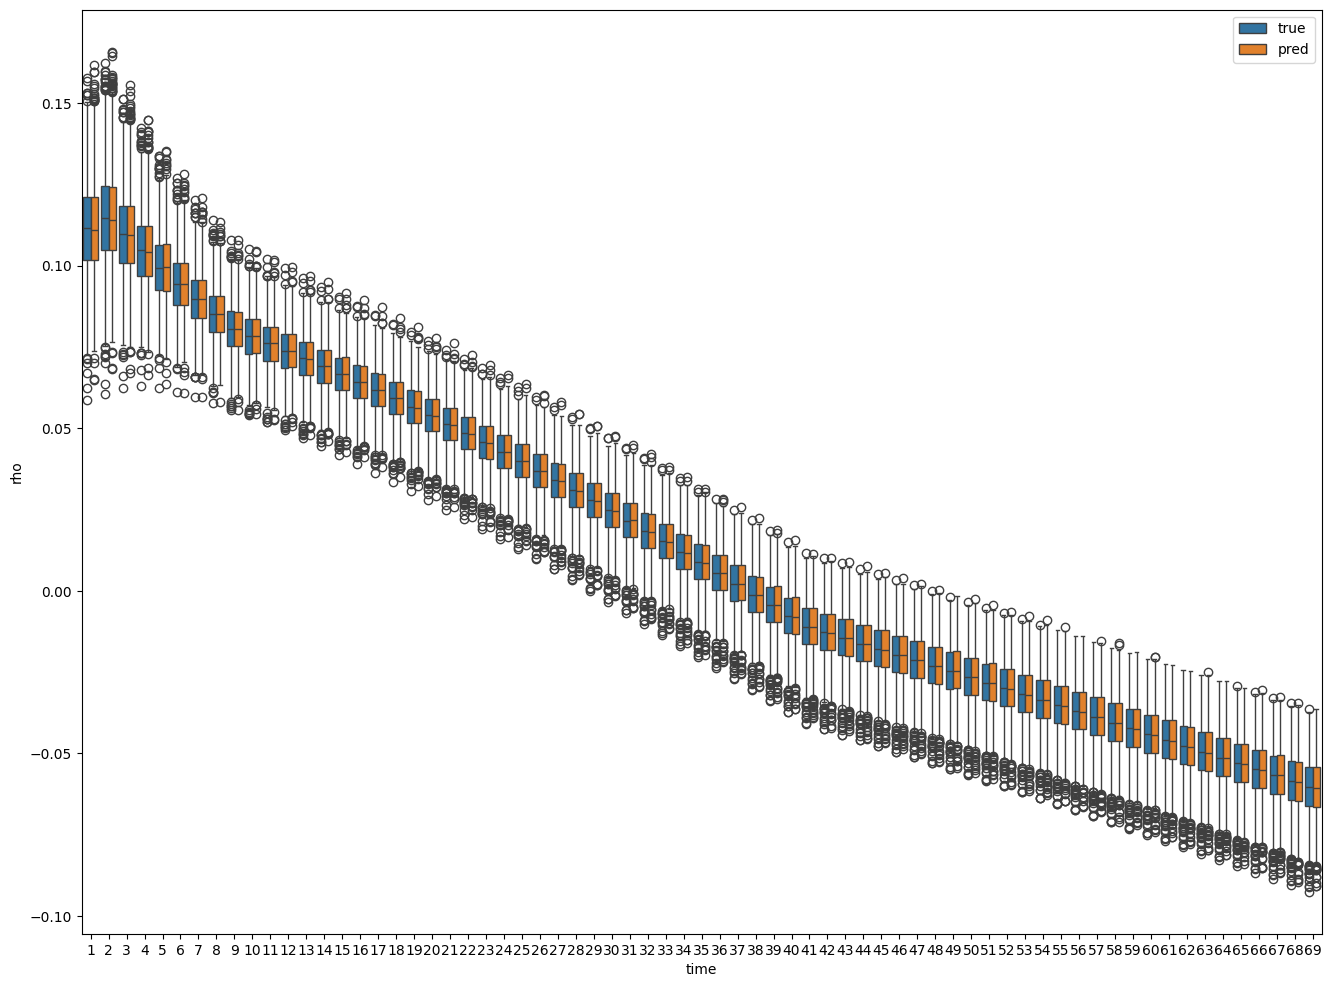

In [19]:
sns.boxplot(x='time', y='rho', data=df_long, hue='origin')
plt.legend(loc='upper right')
figure = plt.gcf()
figure.set_size_inches(16, 12)
# figure.savefig('temp.png')

In [20]:
df_true = df[df['origin'] == 'true'].copy()
df_pred = df[df['origin'] == 'pred'].copy()

df_true.drop(columns=['origin'], inplace=True)
df_pred.drop(columns=['origin'], inplace=True)

df_true = pd.melt(df_true, id_vars=['line'], var_name='time', value_name='rho')
df_pred = pd.melt(df_pred, id_vars=['line'], var_name='time', value_name='rho')

df_true['time'] = df_true['time'].str.extract(r'(\d+)')
df_pred['time'] = df_pred['time'].str.extract(r'(\d+)')

df_errors = pd.merge(
    df_true,
    df_pred,
    how='left',
    on=['line', 'time'],
    suffixes=('_true', '_pred'))

df_errors['error'] = df_errors['rho_true'] - df_errors['rho_pred']
df_errors['square_error'] = df_errors['error'] ** 2
df_errors

,line,time,rho_true,rho_pred,error,square_error
0,0,1,0.124237,0.124832,-0.000596,3.548486e-07
1,1,1,0.105437,0.103497,0.001940,3.762761e-06
2,2,1,0.103920,0.105399,-0.001479,2.186468e-06
3,3,1,0.124348,0.124068,0.000280,7.840429e-08
4,4,1,0.119962,0.122030,-0.002069,4.279852e-06
...,...,...,...,...,...,...
137995,1995,69,-0.059116,-0.059238,0.000122,1.497036e-08
137996,1996,69,-0.049848,-0.049850,0.000002,5.308569e-12
137997,1997,69,-0.056038,-0.055639,-0.000399,1.588506e-07
137998,1998,69,-0.052516,-0.052648,0.000131,1.724206e-08


<Axes: xlabel='time', ylabel='error'>

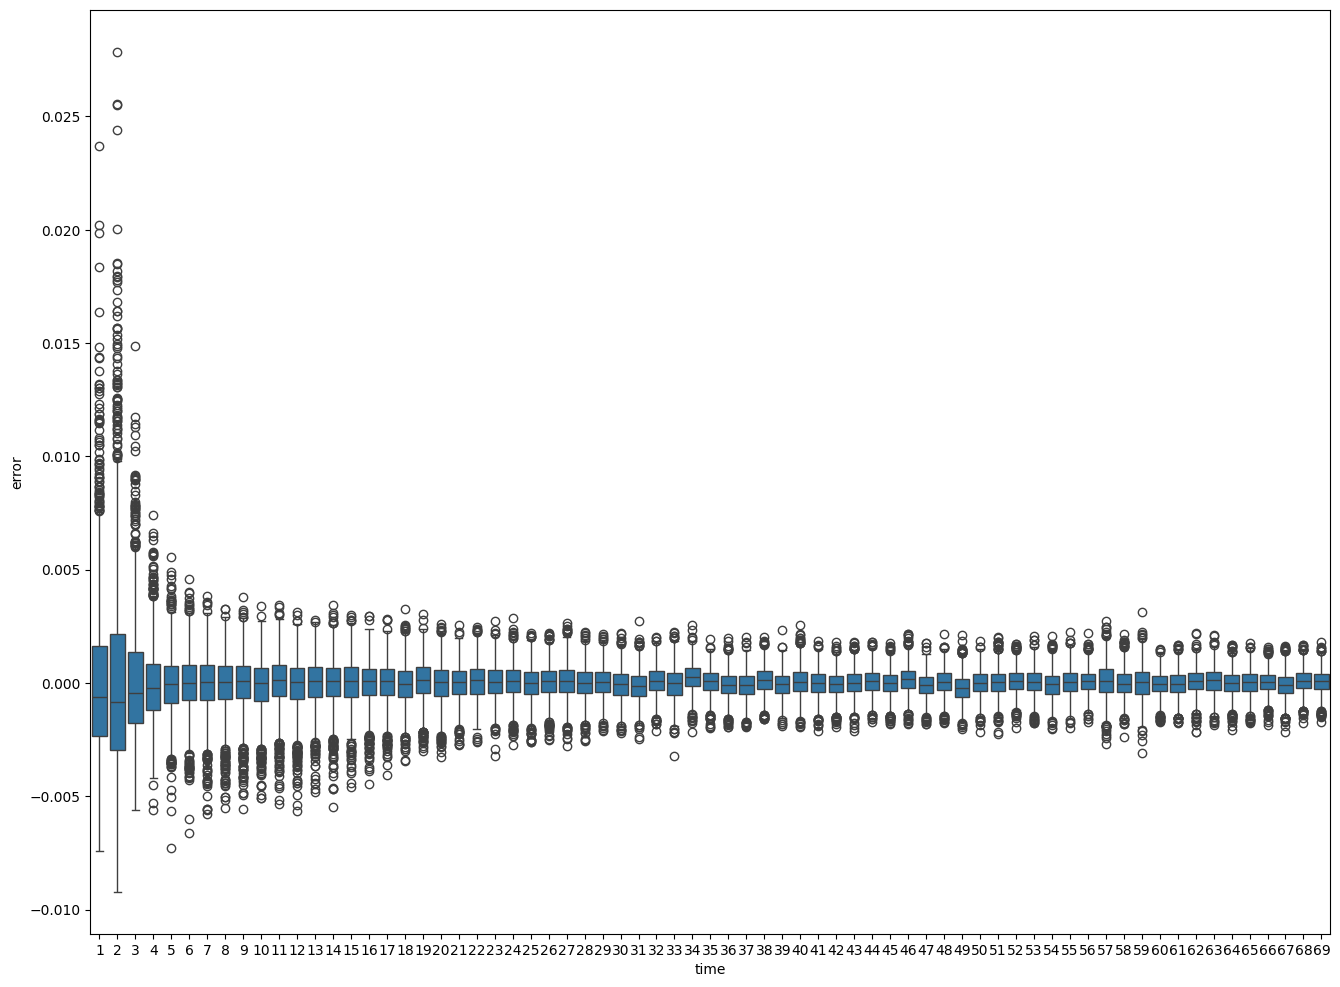

In [21]:
df_boxplot = df_errors[['time', 'error']].copy()
figure = plt.gcf()
figure.set_size_inches(16, 12)
sns.boxplot(x='time', y='error', data=df_boxplot)
# figure.savefig('temp2.png')

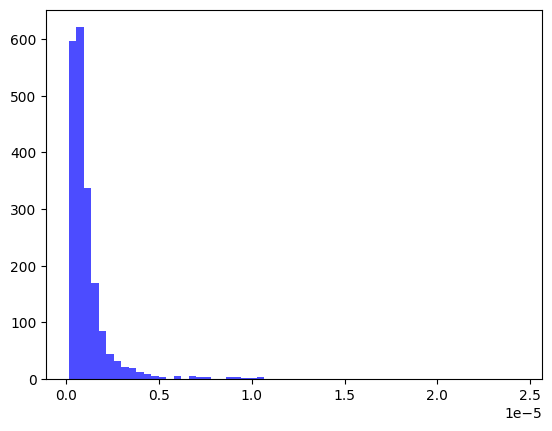

In [22]:
df_histogram = df_errors[['line', 'square_error']].copy()
df_histogram = df_histogram.groupby('line').agg(**{'RMSE': ('square_error', lambda x: sum(x) / len(x))})
plt.hist(df_histogram, bins=60, color='blue', alpha=0.7)
plt.show()

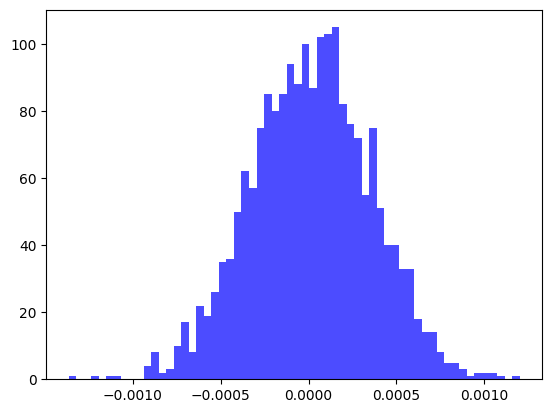

In [23]:
df_histogram2 = df_errors[['line', 'error']].copy()
df_histogram2 = df_histogram2.groupby('line').agg(**{'MSE': ('error', lambda x: sum(x) / len(x))})
plt.hist(df_histogram2, bins=60, color='blue', alpha=0.7)
plt.show()